# Q5

In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow

## part a

<h3> in this section we want to implement histogram equalization </h3>
<h3> you can use opencv library </h3>

In [2]:
image = cv2.imread('./Q5_image/img_improvment.png',cv2.IMREAD_GRAYSCALE)
output_image = image.copy()
##for equalized histogram use func below:
equalize_image = cv2.equalizeHist(output_image)

(-0.5, 383.5, 287.5, -0.5)

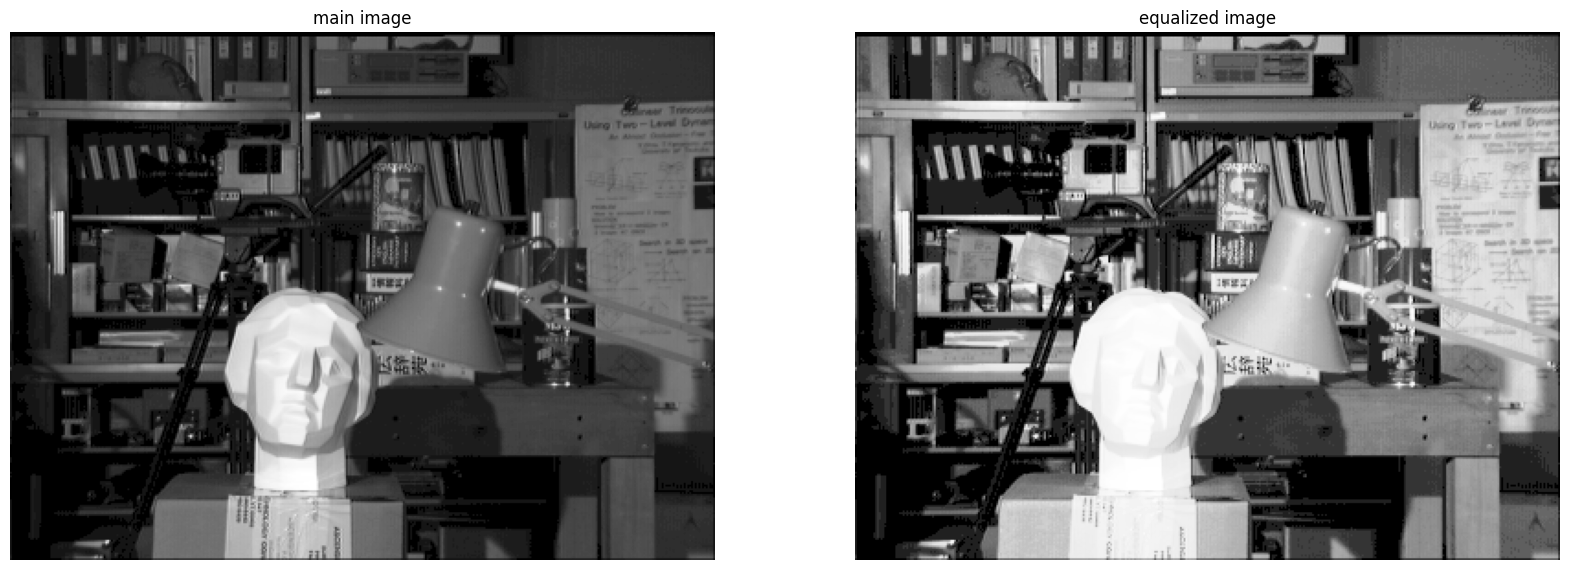

In [3]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(equalize_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part b

<h3> in this section we want to implement the first method for ACE </h3>
<h3> you can use opencv library </h3>
<h3> use 48(6*8) grids (size of the grids should be 48*48) </h3> 

In [4]:
def ACE1(image, gridSize):
  '''
  you can use the equalize function of OpenCV for each grid
  Use first method for ACE implementation (calculating transition function for each grid)
  input(s):
    image (ndarray): input image
    gridSize (int): window size for calculating histogram equalization
  output(s):
    output (ndarray): improved image
  '''
  x,y = image.shape
  output_image = image.copy()
  for i in range(6):
    for j in range(8):
      temp=image[i*48:(i+1)*48,j*48:(j+1)*48]
      output_image[i*48:(i+1)*48,j*48:(j+1)*48]=cv2.equalizeHist(temp)
  
  return output_image

(-0.5, 383.5, 287.5, -0.5)

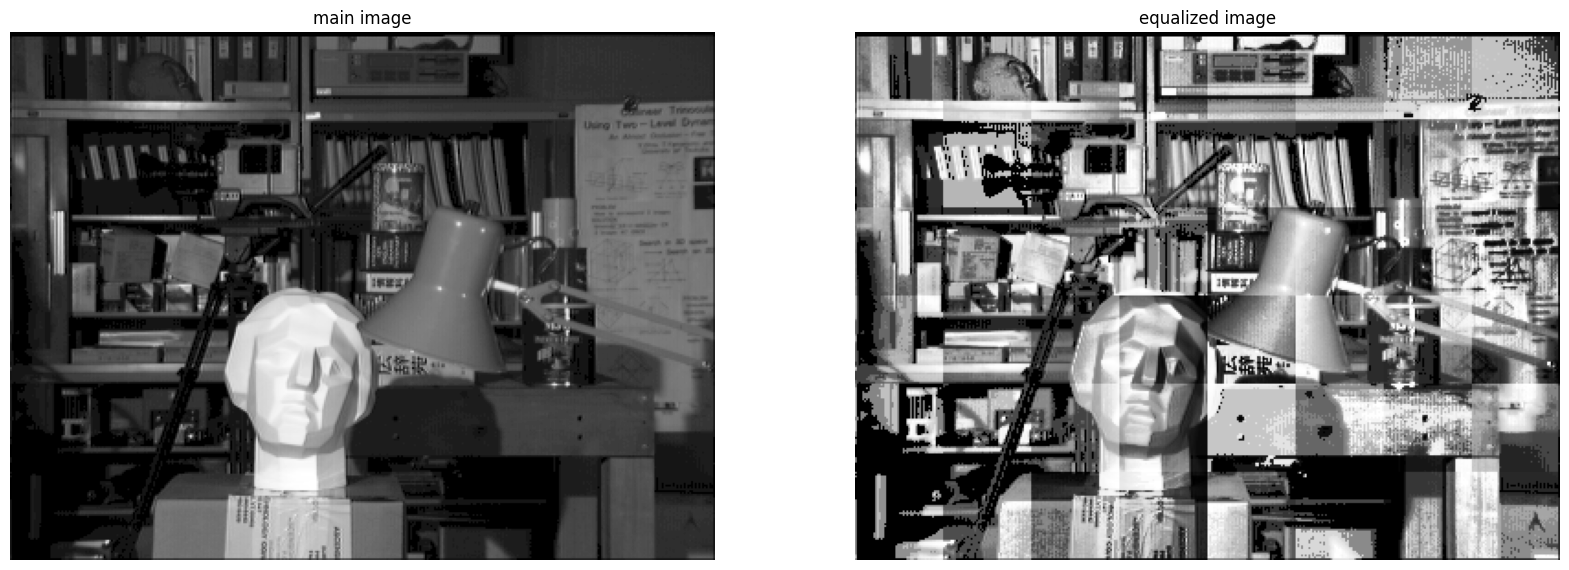

In [5]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = ACE1(image,48)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part c

<h3> in this section we want to implement the second method for ACE </h3>
<h3> you can use opencv library </h3>

In [6]:
def ACE2(image, gridSize):
    '''
    you can just use the equalize function of OpenCV for each grid
    You can use OpenCV built-in tools for applying padding
    Use second method for ACE implementation (calculating transition function for each pixel)
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
    output(s):
      output (ndarray): improved image
    '''
    output = image.copy()
    a=gridSize[0]
    b=gridSize[1]
    left=int(b/2)
    right=b - left - 1
    top=int(a/2)
    bottom=a-top-1
    temp=np.zeros(3)
    resized_image=cv2.copyMakeBorder(image,top,bottom,left,right,cv2.BORDER_CONSTANT,None,temp)
    for i in range(len(output)):
      for j in range (len(output[0])):
        output[i][j]=cv2.equalizeHist(resized_image[i:i+gridSize[0],j:j+gridSize[1]])[top][left]
        
    #######################
    #    your code here   #
    #######################

    return output

(-0.5, 383.5, 287.5, -0.5)

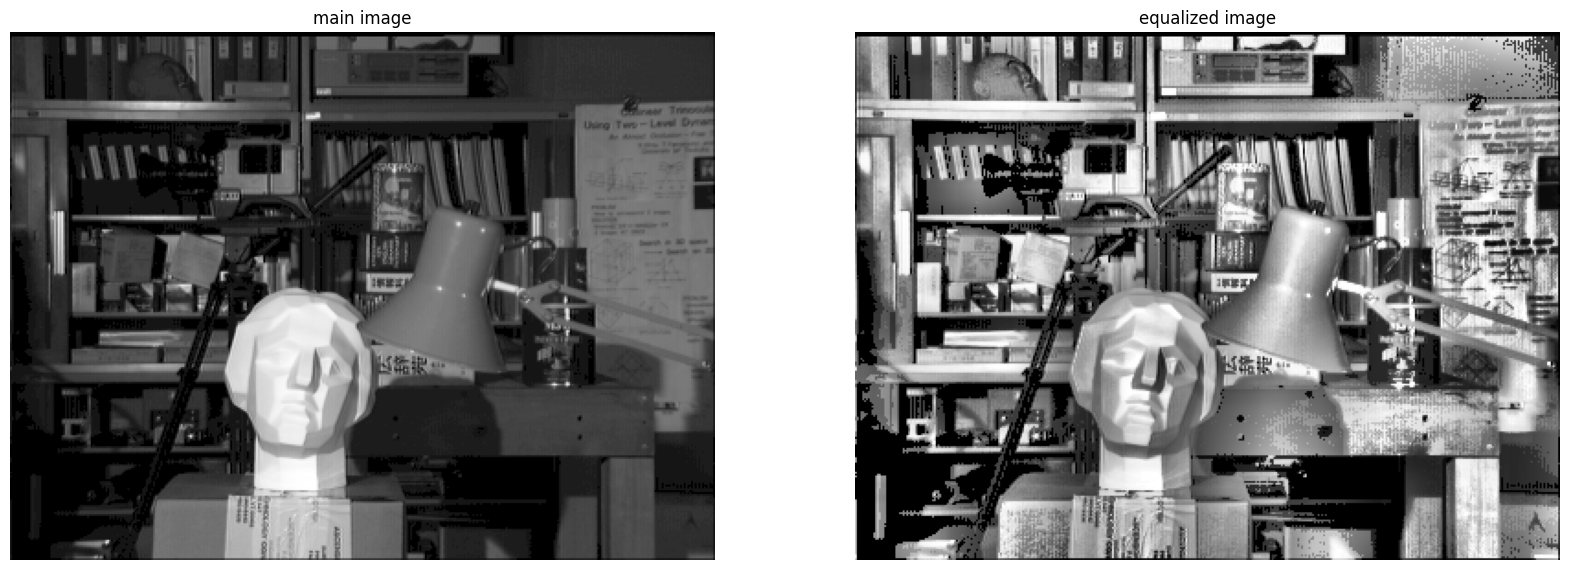

In [7]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = ACE2(image,(70,70))
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part d

<h3> in this section we want to implement CLAHE </h3>
<h3><b> note : you can just use opencv library for calculate histogram and applying padding </b></h3>
<h3><b>note : you can't use the equalize function of opencv</b></h3>

In [8]:
#first write func for calculate histogram and about threshold and equalize 
def calc_hist(img):
    hist=np.zeros(256)
    for i in img:
        for j in i:
            hist[j]+=1
    
    return(hist)

In [10]:
# we can use cumsum for cdf but this part say dont use library
def equalizing(hist):
    a=0
    for i in hist:
        a+=i
    table={}
    cdf=np.zeros(256)
    for i in range(256):
        if hist[i] <= 0:
            if i > 0 :
                cdf[i]=cdf[i-1]
        else:
            if i <= 0:
                cdf[i]=hist[i] 
            else:
                cdf[i]=hist[i] + cdf[i-1]
                
    for i in range(256):
        table[i]=(cdf[i]*255)/a
    return table 

In [11]:
def CLAHE(image, gridSize, clip_limit):
    '''
    you can just use opencv library for calculate histogram and applying padding
    you can't use the equalize function of opencv
    Use second method for ACE implementation (calculating transition function for each pixel)
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
      clip_limit (int): threshold for contrast limiting
    output(s):
      output (ndarray): improved image
    '''
    output = image.copy()
    a=gridSize[0]
    b=gridSize[1]
    left=int(b/2)
    right=b - left - 1
    top=int(a/2)
    bottom=a-top-1
    temp=np.zeros(3)
    t_border=cv2.BORDER_CONSTANT
    resized_image=cv2.copyMakeBorder(image,top,bottom,left,right,cv2.BORDER_CONSTANT,None,temp)
    for i in range(len(output)):
        for j in range (len(output[0])):
          g_hist=calc_hist(resized_image[i:i+gridSize[0],j : j+gridSize[1]])
          
          clahe=g_hist.copy()
          n=0
          for i in range(len(clahe)):
            if clahe[i] > clip_limit:
              n=n + clahe[i] - clip_limit 
              clahe[i]=clip_limit
          for i in range(len(g_hist)):
            clahe[i]=clahe[i] + (n/255)
            
          t=output[i][j] 
          map_table=equalizing(clahe)
          output[i][j]=map_table[t]
    #######################
    #    your code here   #
    #######################    
    return output

KeyboardInterrupt: 

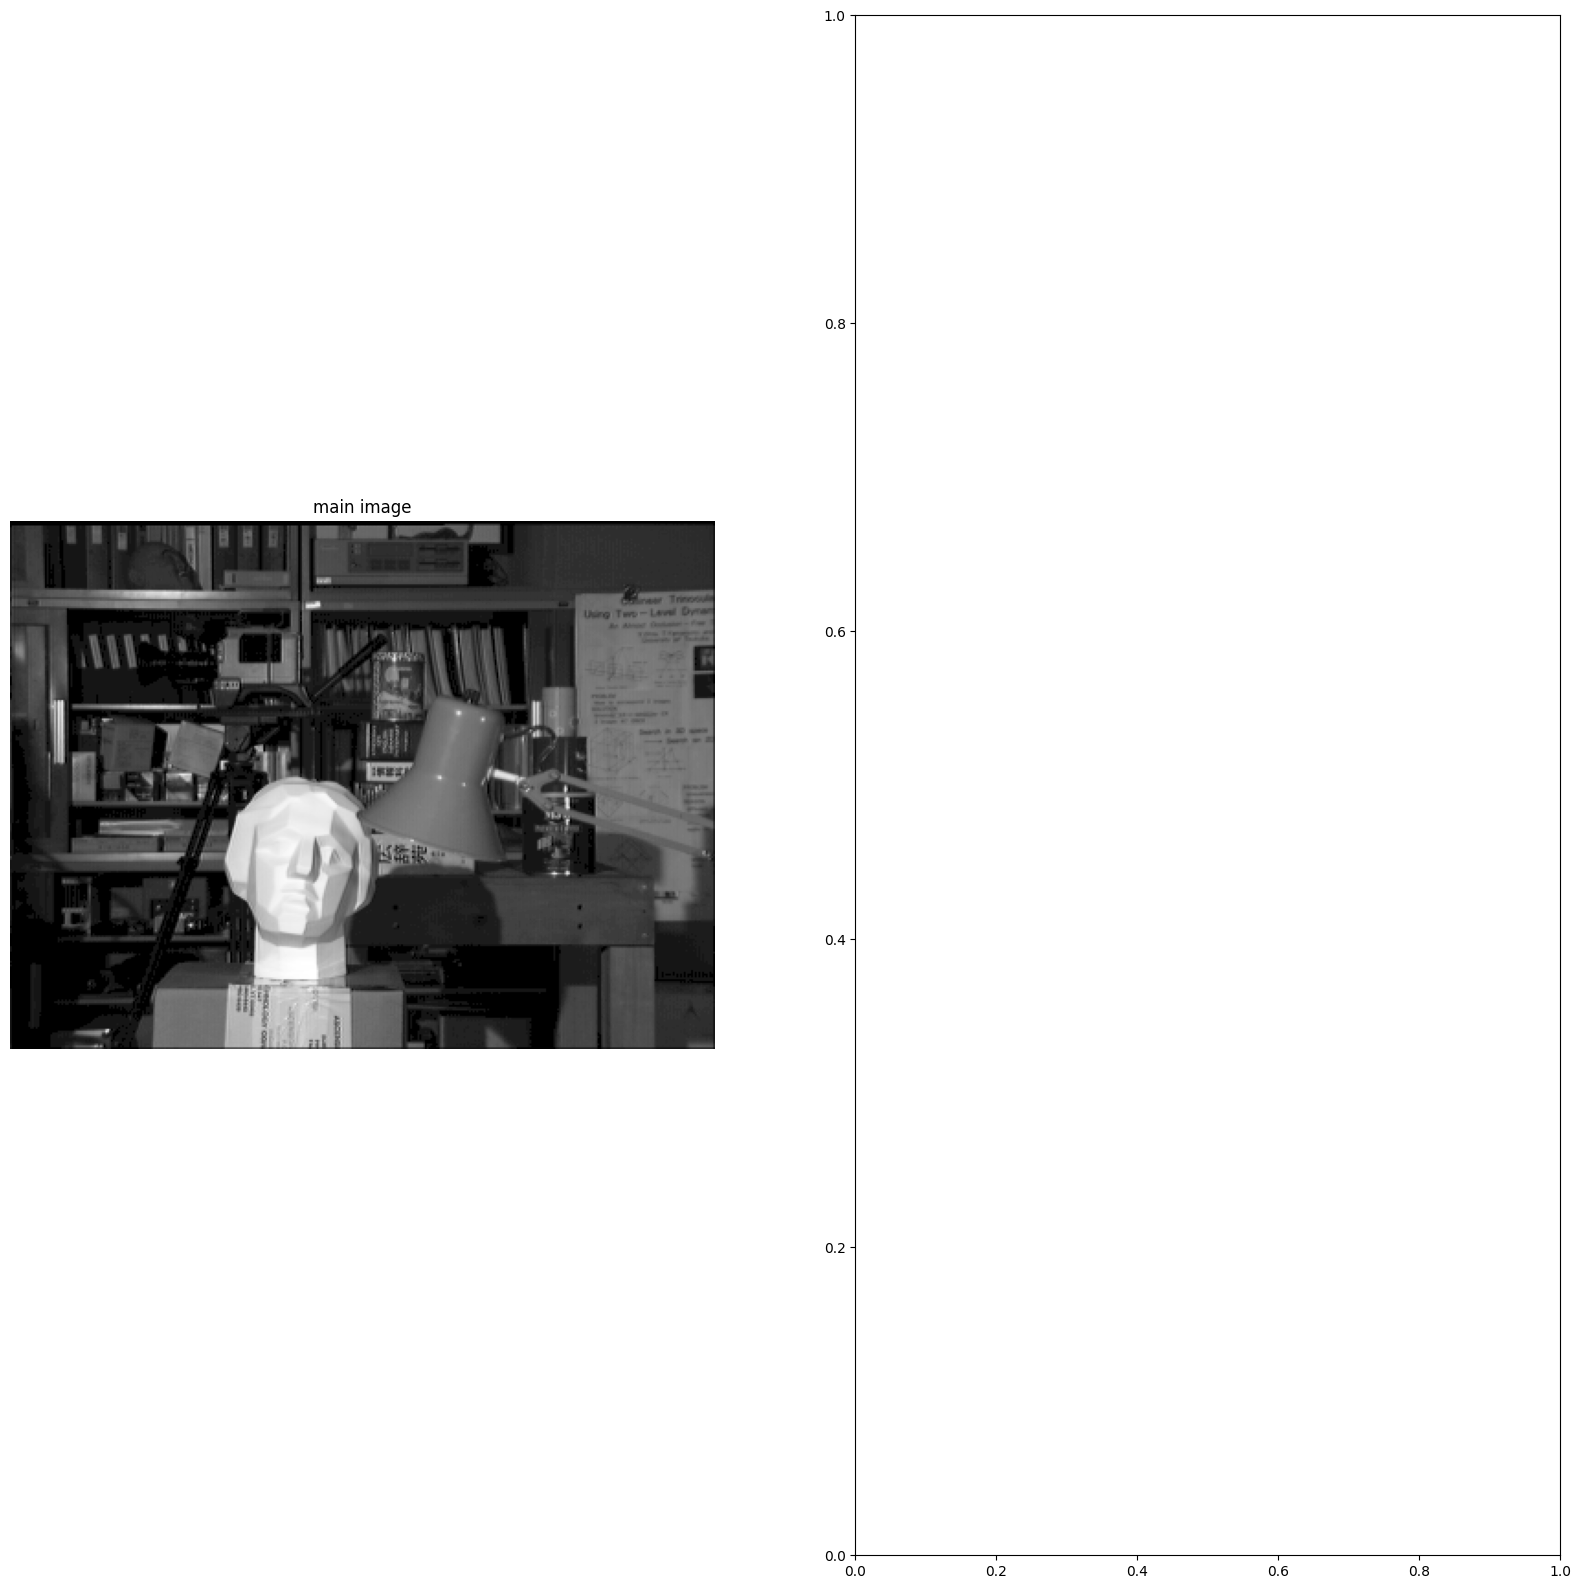

In [12]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = CLAHE(image,(70,70), 100)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')